<div style="text-align: center;"><center><h1> Statistics Term Project Code - Twitter Bot Detection</h1></center></div>

<h3>Introduction</h3>

<p> This dataset offers a unique opportunity to delve into the world of Twitter (now. X) bots. It is composed of a single .csv file containing 11 columns (attributes), 50000 rows (records), and 550000 values.  We explore user profiles, tweet content, retweet counts, and more to uncover patterns and gain insights into user activity (or bot activity). Furthermore, we’ll use the provided dataset to try and identify bot activity through the use of some classification method(s).</p>

<p> Source: <a href = 'https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset'>https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset</a> </p>

<h3>Install Packages:</h3>

In [84]:
!pip install kaggle networkx dowhy

<h3> Import Libraries </h3>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import time
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as st
import dowhy
from dowhy import CausalModel
import networkx as nx

<h3> Import Dataset </h3>

In [86]:
!rm twitter-bot-detection-dataset.zip

In [87]:
!kaggle datasets download goyaladi/twitter-bot-detection-dataset
!yes | unzip twitter-bot-detection-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset
License(s): CC0-1.0
 68%|█████████████████████████▊            | 2.00M/2.94M [00:00<00:00, 6.62MB/s]
100%|██████████████████████████████████████| 2.94M/2.94M [00:00<00:00, 8.56MB/s]
Archive:  twitter-bot-detection-dataset.zip
replace Readme.md? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: Readme.md               
replace bot_detection_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: bot_detection_data.csv  
yes: stdout: Broken pipe


In [88]:
csv = 'bot_detection_data.csv'
df = pd.read_csv(csv)

<h3> Data Exploration </h3>

<p>Let's first take a glance at our dataset</p>

In [89]:
type(df)

pandas.core.frame.DataFrame

In [90]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [91]:
df.tail()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star
49999,311204,daniel29,Here morning class various room human true bec...,91,4,4006,False,0,Novakberg,2022-12-03 06:11:07,home


In [92]:
df.sample(2)

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
28311,975216,megansoto,Collection sea require choice somebody learn w...,52,2,8676,True,1,Kristinaton,2020-01-18 14:44:49,including ability ready space
6719,364519,mitchelltravis,Red church hospital different model number sta...,5,4,1754,True,1,Rodrigueztown,2021-01-31 06:28:51,hotel


<br>
<p> Looking at the dimensions, and size of our dataset... </p>

In [93]:
df.shape

In [94]:
df.size

In [95]:
df.dtypes

User ID            int64
Username          object
Tweet             object
Retweet Count      int64
Mention Count      int64
Follower Count     int64
Verified            bool
Bot Label          int64
Location          object
Created At        object
Hashtags          object
dtype: object

<br>
<p> Now, let's perform a simple analysis before processing the data.</p>

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [97]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


Displaying the number of unique values in each column.

In [98]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in User ID: 50000
Unique values in Username: 40566
Unique values in Tweet: 50000
Unique values in Retweet Count: 101
Unique values in Mention Count: 6
Unique values in Follower Count: 9923
Unique values in Verified: 2
Unique values in Bot Label: 2
Unique values in Location: 25199
Unique values in Created At: 49989
Unique values in Hashtags: 34247


Let's visualize the relationships between our target and a few select features, namely <code>Retweet Count</code>, <code>Mention Count</code>, and <code>Follower Count</code>.

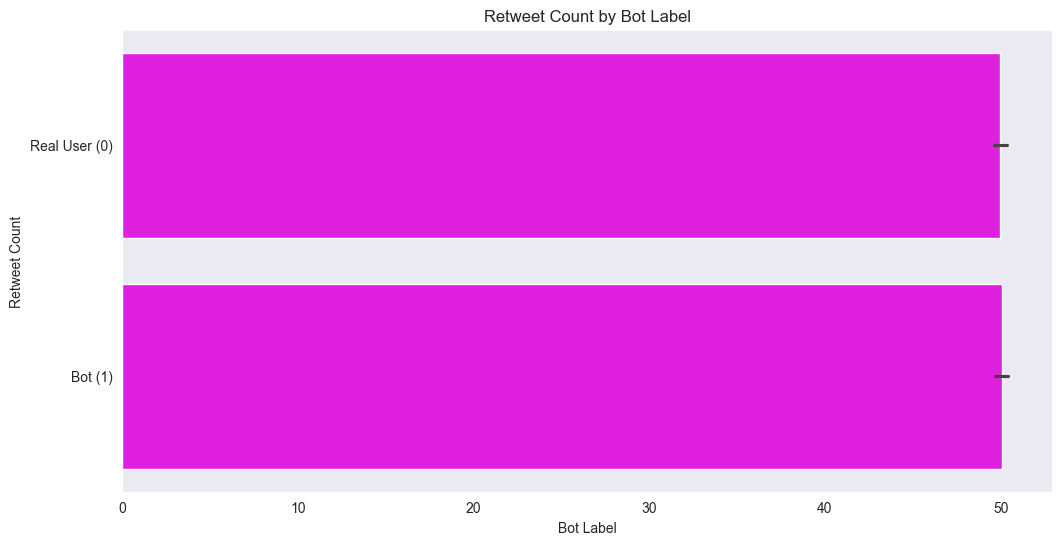

In [99]:
#creating a box plot to visualize the distribution between Retweet Count and Bot Label
sns.set_style("dark")
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Retweet Count', y='Bot Label', color='magenta', legend=None, orient='h')
plt.title('Retweet Count by Bot Label')
plt.xlabel('Bot Label')
plt.ylabel('Retweet Count')
plt.tick_params(top=False)
plt.yticks([0, 1], ['Real User (0)', 'Bot (1)'])
plt.show()

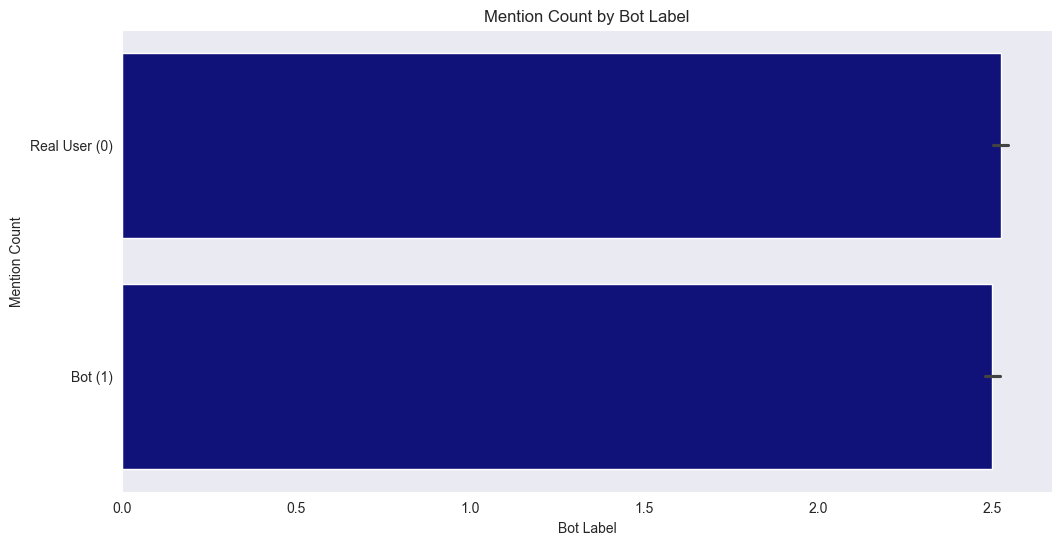

In [100]:
#creating a box plot to visualize the distribution between Retweet Count and Bot Label
sns.set_style("dark")
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Mention Count', y='Bot Label', color='darkblue', legend=None, orient='h')
plt.title('Mention Count by Bot Label')
plt.xlabel('Bot Label')
plt.ylabel('Mention Count')
plt.tick_params(top=False)
plt.yticks([0, 1], ['Real User (0)', 'Bot (1)'])
plt.show()

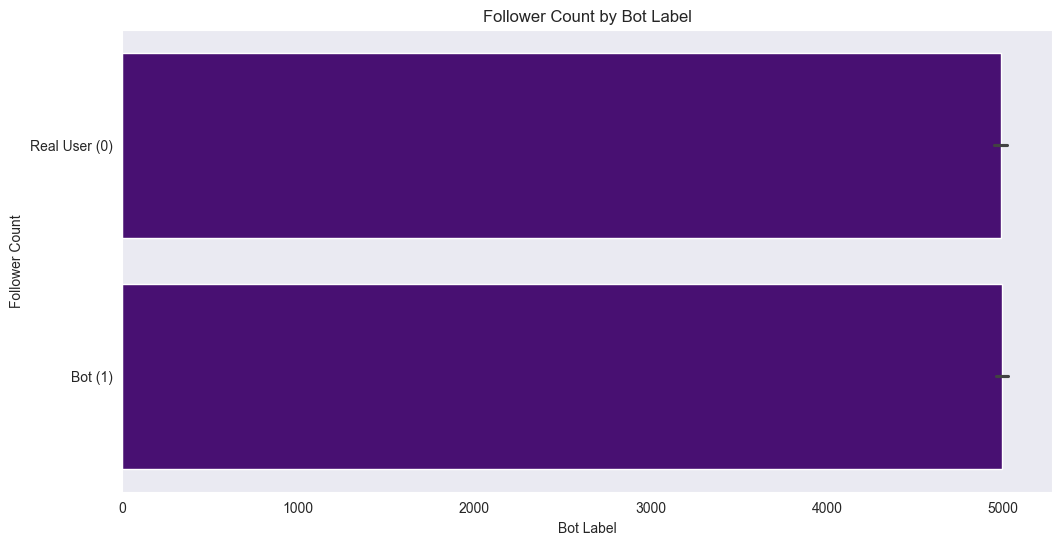

In [101]:
#creating a bar plot for Follower Count vs. Bot Label
sns.set_style("dark")
plt.figure(figsize=(12, 6))
sns.barplot( data=df, x='Follower Count', y='Bot Label',color='indigo', legend=None, orient='h')
plt.title('Follower Count by Bot Label')
plt.xlabel('Bot Label')
plt.ylabel('Follower Count')
plt.yticks([0, 1], ['Real User (0)', 'Bot (1)'])
plt.show();

Finally, let's look at the distribution for these features (via violinplots 

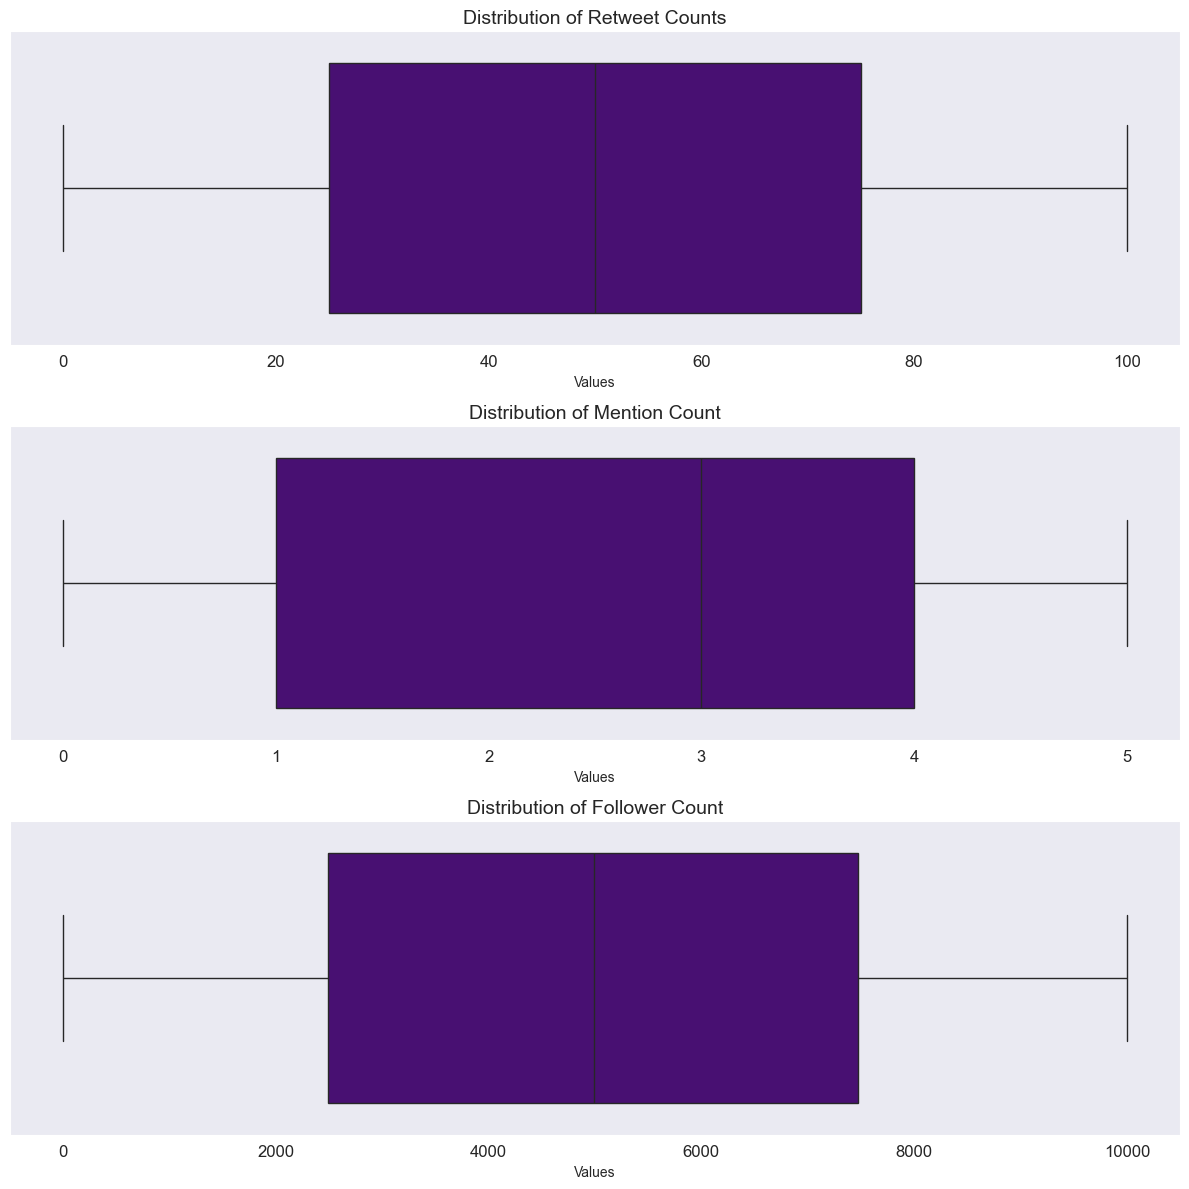

In [102]:
#visualize the distribution of the data points for each variable
sns.set_style("dark")
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
sns.boxplot(x=df['Retweet Count'], ax=axs[0], color='indigo')
axs[0].set_title('Distribution of Retweet Counts', fontsize=14)
axs[0].set_xlabel('Values', fontsize=10)
axs[0].tick_params(axis='both', labelsize=12)
sns.boxplot(x=df['Mention Count'], ax=axs[1], color='indigo')
axs[1].set_title('Distribution of Mention Count', fontsize=14)
axs[1].set_xlabel('Values', fontsize=10)
axs[1].tick_params(axis='both', labelsize=12)
sns.boxplot(x=df['Follower Count'], ax=axs[2], color='indigo')
axs[2].set_title('Distribution of Follower Count', fontsize=14)
axs[2].set_xlabel('Values', fontsize=10)
axs[2].tick_params(axis='both', labelsize=12) 
plt.tight_layout()
plt.show()

<h3>Data Cleaning</h3>

- Check for duplicate rows
- Remove irrelevant columns
- Check for missing values & deal w/ them

<br>
<p> Let's check to see if there are any duplicate values in our dataset.</p>

In [103]:
#shows total count of duplicate rows
df.duplicated().sum()

0

<br>
<p>Next, let's reduce the redundancy by removing all irrelevant columns (ie. feature selection).</p>

i. Dropping <code>User ID</code>, <code>Username</code>.

In [104]:
#dropping since these 2 columns are unique to each user it doesn't much valuable information about the tweet's content or characteristics
df.drop(columns=['User ID', 'Username'], inplace=True)

ii. Droping the <code>Location</code> column.

In [105]:
#split bot and not bot data
bot_df = df[df['Bot Label'] == 1]
real_df = df[df['Bot Label'] == 0]

#counting the unique locations for each group
unique_locations_bot = bot_df['Location'].nunique()
unique_locations_real = real_df['Location'].nunique()

print('Number of unique locations for bot entries:', unique_locations_bot)
print('Number of unique locations for real user entries:', unique_locations_real)

Number of unique locations for bot entries: 15651
Number of unique locations for real user entries: 15642


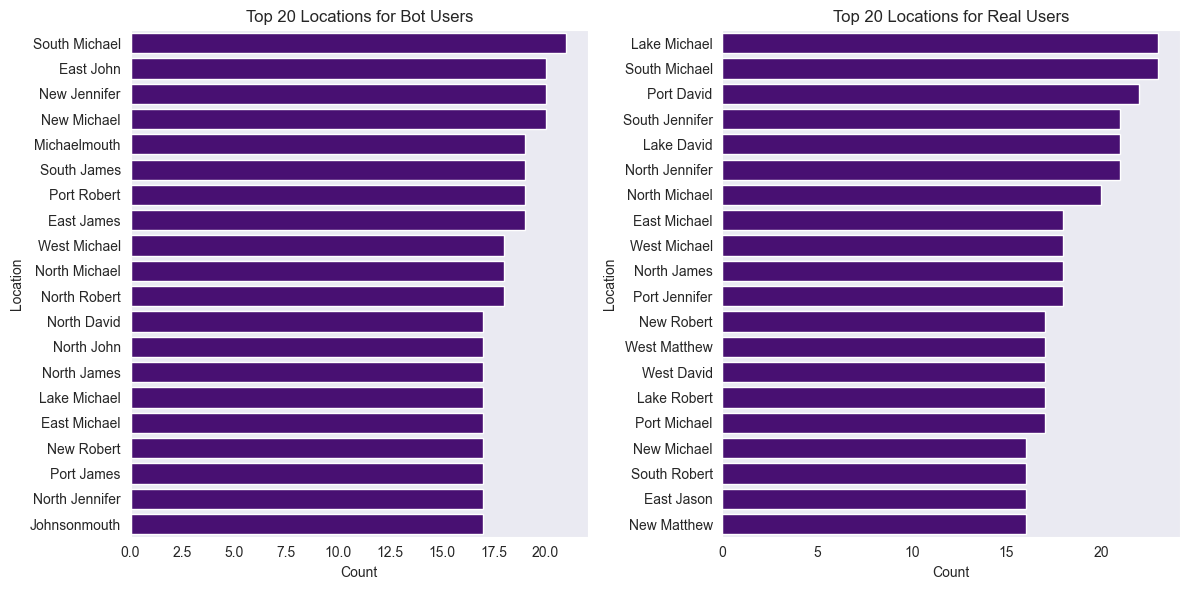

In [106]:
#count of bots and real users logged from each Location (showing top 20)
sns.set_style("dark")
bot_location_counts = df[df['Bot Label'] == 1]['Location'].value_counts().head(20)  
real_location_counts = df[df['Bot Label'] == 0]['Location'].value_counts().head(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
sns.barplot(ax=ax1, x=bot_location_counts.values, y=bot_location_counts.index, color='indigo')
ax1.set_title('Top 20 Locations for Bot Users')
ax1.set_xlabel('Count')
ax1.set_ylabel('Location')
sns.barplot(ax=ax2, x=real_location_counts.values, y=real_location_counts.index, color='indigo')
ax2.set_title('Top 20 Locations for Real Users')
ax2.set_xlabel('Count')
ax2.set_ylabel('Location')

plt.tight_layout()
plt.show();

In [107]:
#dropping this column since there are far too many locations, also additional geo information is not provided (ie.coordinates, countries etc.)
df.drop(columns=['Location'], inplace=True)

iii. Dropping the <code>Created At</code> column.

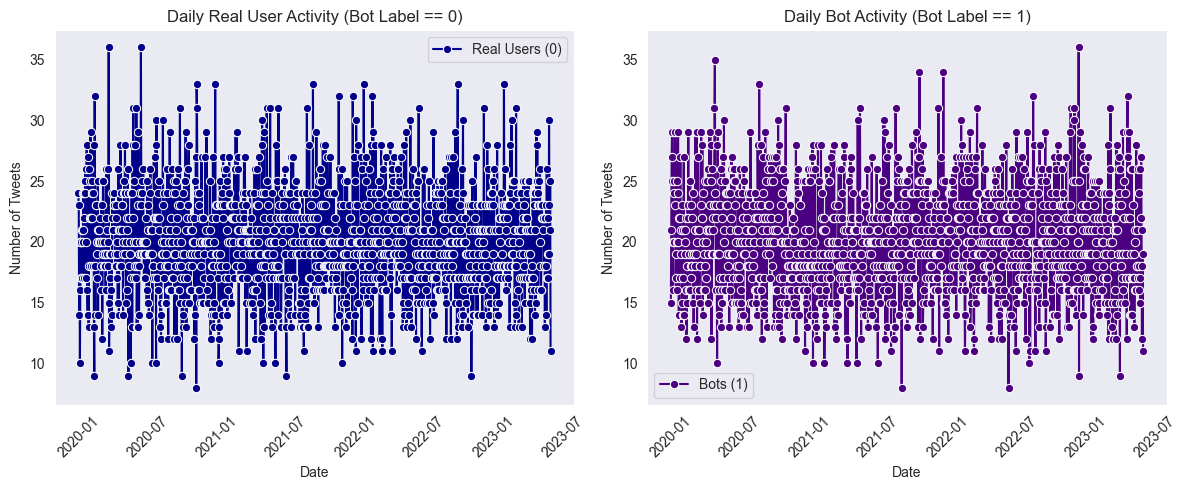

In [108]:
#creating a plot of the the count of bot and real user activity over time using the 'Create Date' variable
df['Created At'] = pd.to_datetime(df['Created At'], errors='coerce')
df['Created Date'] = df['Created At'].dt.date
daily_bot_activity = df.groupby(['Created Date', 'Bot Label']).size().reset_index(name='Count')

daily_bot_activity_0 = daily_bot_activity[daily_bot_activity['Bot Label'] == 0]
daily_bot_activity_1 = daily_bot_activity[daily_bot_activity['Bot Label'] == 1]

plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1) 
sns.lineplot(x='Created Date', y='Count', data=daily_bot_activity_0, marker='o', color='darkblue', label='Real Users (0)', ax=ax1) 
ax1.set_title('Daily Real User Activity (Bot Label == 0)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets')
plt.xticks(rotation=45)

ax2 = plt.subplot(1, 2, 2)  
sns.lineplot(x='Created Date', y='Count', data=daily_bot_activity_1, marker='o', color='indigo', label='Bots (1)', ax=ax2)  
ax2.set_title('Daily Bot Activity (Bot Label == 1)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Tweets')
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend() 
plt.show()

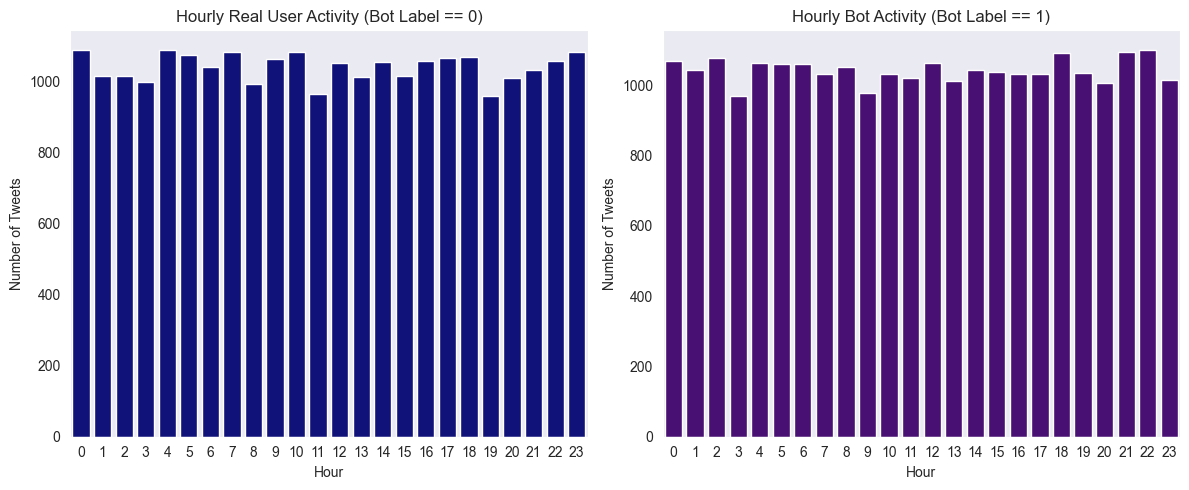

In [109]:
# extracting the hour part of 'Created At' for hourly trends
df['Created Hour'] = df['Created At'].dt.hour
hourly_bot_activity = df.groupby(['Created Hour', 'Bot Label']).size().reset_index(name='Count')

hourly_bot_activity_0 = hourly_bot_activity[hourly_bot_activity['Bot Label'] == 0]
hourly_bot_activity_1 = hourly_bot_activity[hourly_bot_activity['Bot Label'] == 1]

plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)  
sns.barplot(x='Created Hour', y='Count', data=hourly_bot_activity_0, color='darkblue', ax=ax1) 
ax1.set_title('Hourly Real User Activity (Bot Label == 0)')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Tweets')

ax2 = plt.subplot(1, 2, 2) 
sns.barplot(x='Created Hour', y='Count', data=hourly_bot_activity_1, color='indigo', ax=ax2) 
ax2.set_title('Hourly Bot Activity (Bot Label == 1)')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Number of Tweets')

plt.tight_layout()
plt.show()

In [110]:
#dropping as datatime information on tweets may not be useful for this classification
df.drop(columns=['Created At', 'Created Date', 'Created Hour'], inplace=True)

Note: This affirms my intial suspicion, that bot behavior is often consistent over time (as can be seen from the graphs above the bot data displays similar pattern to the real user data), and that the date column would not be adding much value to our analysis (less important feature for classification models). Additionally, there is the added complexity of using a datetime column in our models.
<br>

<br>
<p>Now, let's check the number of nulls in each columns.</p>

In [111]:
#shows number of missing values (nulls) per column
df.isna().sum()

Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Hashtags          8341
dtype: int64

In [112]:
#shows percentage of missing data in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages.map('{:.2f}%'.format))

Tweet              0.00%
Retweet Count      0.00%
Mention Count      0.00%
Follower Count     0.00%
Verified           0.00%
Bot Label          0.00%
Hashtags          16.68%
dtype: object


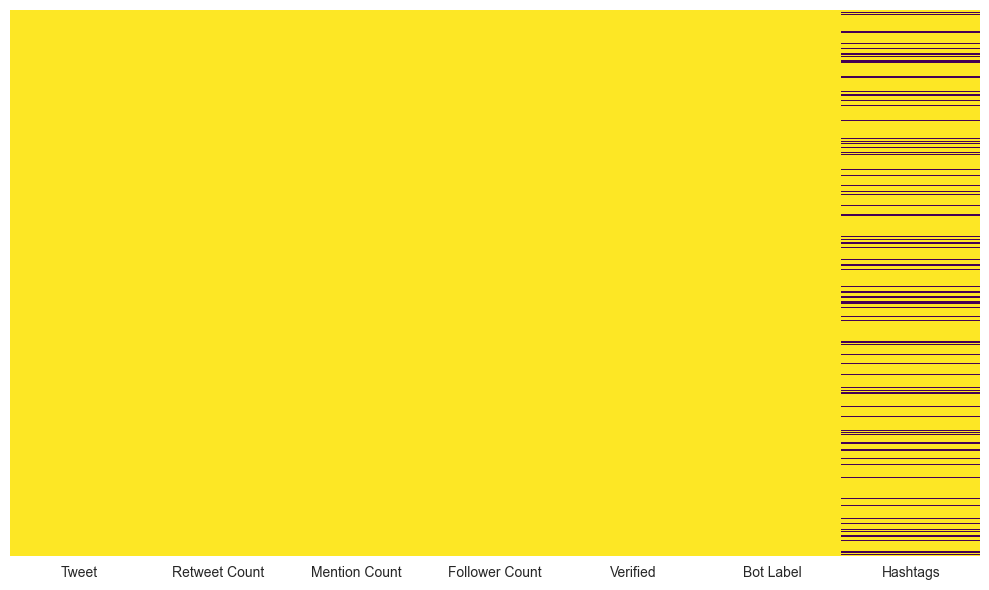

In [113]:
#plot of the missing values for each column
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis_r')
plt.tight_layout()
plt.show()

Note:  It appears that only the <code>Hashtags</code> column has missing values. Since we intend use this column for feature engineering, let's not do anything with it for now.</p>

<h3>Feature Engineering</h3>

<p> First, let's rename some of the existing columns to match naming conventions (we'll use snake_case to name our variables).</p>

In [114]:
df = df.rename(columns={'Tweet': 'tweet',
                        'Retweet Count': 'retweet_count',
                        'Mention Count': 'mention_count',
                        'Follower Count': 'follower_count', 
                        'Verified': 'verified', 
                        'Bot Label': 'bot_label',
                        'Hashtags': 'hashtags'})

<p> Creating new variable <code>tweet_count</code> capturing word count of each tweet, and dropping the <code>Tweet</code> column.</p>

In [115]:
#counting the number of tweets
df['tweet_count'] = df['tweet'].str.count(' ') + 1

In [116]:
#converting from float to int type
df['tweet_count'] = df['tweet_count'].astype(int)

In [117]:
#dropping the Hashtags columns as it is no longer needed
df.drop(columns=['tweet'], inplace=True)

<p> Creating new variable <code>hashtag_count</code> finding the number of hashtags per tweet, and dropping the <code>Hashtags</code> column.</p>

In [118]:
#counting the number of hashtags
df['hashtag_count'] = df['hashtags'].str.count(' ') + 1

In [119]:
#filling the null values (8341 missing values) with 0, looking at the structure of our dataset these tweets likely did not use a hashtag
df['hashtag_count'] = df['hashtag_count'].fillna(0)

In [120]:
#converting from float to int type
df['hashtag_count'] = df['hashtag_count'].astype(int)

In [121]:
#dropping the Hashtags columns as it is no longer needed
df.drop(columns=['hashtags'], inplace=True)

<p> Let's create a new column <code>retweet_follower_ratio</code> to capture the ratio of retweets given the follower count.</p>

In [122]:
#creating new column 'retweet_follower_ratio'
df['retweet_follower_ratio'] = df['retweet_count']/(df['follower_count'] + 1e-6) *100

<p> Let's create a new column <code>mention_follower_ratio</code> to capture the ratio of mentions to followers.</p>

In [123]:
#creating new column 'mention_follower_ratio'
df['mention_follower_ratio'] = df['mention_count']/(df['follower_count'] + 1e-6) *100

<p> Let's convert the <code>verified</code> column from bool type to int.</p>

In [124]:
#converting to int data type
df['verified'] = df['verified'].astype(int)
#checking to confirm data type has been changed
print(df['verified'].dtypes)

int64


<h3> Data Inspection </h3>

Starting off by checking the final dataframe <code>df</code>, and some basic statistics.

In [125]:
df.head()

,retweet_count,mention_count,follower_count,verified,bot_label,tweet_count,hashtag_count,retweet_follower_ratio,mention_follower_ratio
0,85,1,2353,0,1,12,0,3.612410,0.042499
1,55,5,9617,1,0,10,2,0.571904,0.051991
2,6,2,4363,1,0,10,2,0.137520,0.045840
3,54,5,2242,1,1,7,4,2.408564,0.223015
4,26,3,8438,0,1,6,2,0.308130,0.035553


In [126]:
df.dtypes

retweet_count               int64
mention_count               int64
follower_count              int64
verified                    int64
bot_label                   int64
tweet_count                 int64
hashtag_count               int64
retweet_follower_ratio    float64
mention_follower_ratio    float64
dtype: object

In [127]:
df.describe()

,retweet_count,mention_count,follower_count,verified,bot_label,tweet_count,hashtag_count,retweet_follower_ratio,mention_follower_ratio
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04
mean,50.00560,2.513760,4988.602380,0.500080,0.500360,9.571200,2.500260,5.160048e+05,2.000023e+04
std,29.18116,1.708563,2878.742898,0.500005,0.500005,2.329463,1.709368,6.401731e+07,2.756765e+06
min,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000e+00,0.000000e+00
25%,25.00000,1.000000,2487.750000,0.000000,0.000000,8.000000,1.000000,4.956986e-01,2.015316e-02
50%,50.00000,3.000000,4991.500000,1.000000,1.000000,10.000000,2.000000,1.001605e+00,5.042123e-02
75%,75.00000,4.000000,7471.000000,1.000000,1.000000,12.000000,4.000000,2.006044e+00,1.005846e-01
max,100.00000,5.000000,10000.000000,1.000000,1.000000,14.000000,5.000000,9.700000e+09,5.000000e+08


Plotting a heatmap of the correlation matrix.

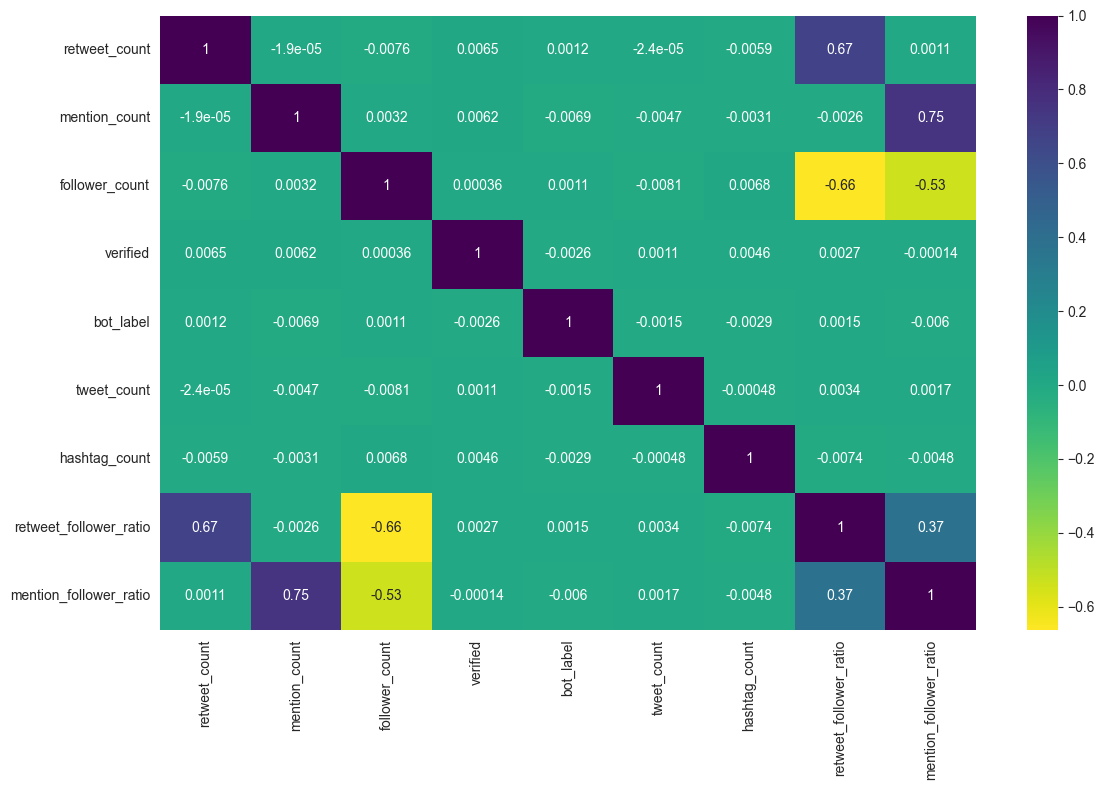

In [128]:
#plotting correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman'), cmap='viridis_r', annot=True)
plt.tight_layout()
plt.show()

Note: This could be indicative of an absense of collinearity.

<p> Let's check to see if the groups are balanced. </p>

In [129]:
#checking ratio of bots, and real users in the target column
total = df['bot_label'].count()
bot_users = (df['bot_label'] == 0).sum()
real_users = (df['bot_label'] == 1).sum()
print('bots:', (bot_users/total) *100,'%')
print('real users:', (real_users/total) *100, '%')

bots: 49.964 %
real users: 50.036 %


Note: The groups look relatively balanced.

Let's perform a t-test on a few of our variables.

In [130]:
#columns to test (excluding 'Bot Label' and 'Created At')
columns_to_test = ['retweet_count', 'mention_count', 'follower_count']

#initialize a dictionary to store results
results = {}

#perform t-tests for each column
for column in columns_to_test:
    #split the data based on Bot Label
    group0 = df[df['bot_label'] == 0][column].dropna()
    group1 = df[df['bot_label'] == 1][column].dropna()
    
    #perform t-test
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)  # Welch’s t-test
    
    #store results
    results[column] = {
        't_stat': t_stat,
        'p_value': p_value
    }

for column, result in results.items():
    print(f"Column: {column}")
    print(f"  t-statistic: {result['t_stat']:.4f}")
    print(f"  p-value: {result['p_value']:.4f}")
    print()

Column: retweet_count
  t-statistic: -0.2795
  p-value: 0.7799

Column: mention_count
  t-statistic: 1.5456
  p-value: 0.1222

Column: follower_count
  t-statistic: -0.2598
  p-value: 0.7950



<h3> Build Model</h3>

- Logistic Regression
- Decision Tree Classifier (Grid Search technique)
- Ensemble Models (Random Forest, Gradient Boosted Trees)

<p>Let's set up our target and features variables.</p>

In [131]:
X = df.drop('bot_label', axis=1)

In [132]:
y = df['bot_label']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1) #explained variance of 95%
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [136]:
start = time.time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_pca, y_train)
y_pred_1 = logreg.predict(X_test_pca)

cv_scores = cross_val_score(logreg, X_train_pca, y_train, cv=5)
end = time.time()

print("Classification Report:")
print(classification_report(y_test, y_pred_1))
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print('Time: {:.2f}s'.format(end - start))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4968
           1       0.00      0.00      0.00      5032

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

Cross-Validation Scores: [0.500125 0.500375 0.499875 0.500375 0.50025 ]
Average CV Score: 0.5002
Time: 0.12s


/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<br>
<b>Logistic Regression</b>

In [137]:
start = time.time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_1 = logreg.predict(X_test)

cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)
end = time.time()

print("Classification Report:")
print(classification_report(y_test, y_pred_1))
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print('Time: {:.2f}s'.format(end - start))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.54      4968
           1       0.51      0.44      0.47      5032

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000

Cross-Validation Scores: [0.48775  0.486375 0.494625 0.49225  0.491875]
Average CV Score: 0.49057500000000004
Time: 0.12s


In [138]:
#printing a summary of the logistic regression results
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.693108
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              bot_label   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49991
Method:                           MLE   Df Model:                            8
Date:                Sat, 17 Aug 2024   Pseudo R-squ.:               5.593e-05
Time:                        21:28:08   Log-Likelihood:                -34655.
converged:                       True   LL-Null:                       -34657.
Covariance Type:            nonrobust   LLR p-value:                    0.8681
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0383      0.048      0.790      0.429      -0.057      

Note: The p-values for each coefficient indicate whether the variable is statistically significant in predicting the bot_label. Typically, a p-value < 0.05 is considered significant. The coefficients tell you the direction and strength of the relationship between each independent variable and the bot_label.

<br>
<b>Decision Tree Classifier (Grid Search)</b>

In [139]:
start = time.time()
param_grid = {
    'max_depth': [None, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']}
model_v2 = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model_v2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_2 = best_model.predict(X_test)
end = time.time()

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Classification Report:")
print(classification_report(y_test, y_pred_2))
print("Cross-validation Score (using GridSearchCV):", grid_search.best_score_)
print('Time: {:.2f}s'.format(end - start))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}
Best score: 0.5023500000000001
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      4968
           1       0.50      0.49      0.49      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Cross-validation Score (using GridSearchCV): 0.5023500000000001
Time: 4.72s


<br>
<b>Ensemble Models</b>

i. Random Forest Classifier

In [140]:
start = time.time()
ranfor = RandomForestClassifier(random_state=42)
ranfor.fit(X_train, y_train)
y_pred_3 = ranfor.predict(X_test) 

cv_scores = cross_val_score(ranfor, X_train, y_train, cv=5)
end = time.time()

print("Classification Report:")
print(classification_report(y_test, y_pred_3))
print("Cross-Validation Scores:", cv_scores)
print('Time: {:.2f}s'.format(end - start))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      4968
           1       0.51      0.50      0.50      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Cross-Validation Scores: [0.504625 0.4945   0.50725  0.50125  0.50325 ]
Time: 25.76s


ii. Gradient Boosting Classifier

In [141]:
start = time.time()
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)
y_pred_4 = gbt.predict(X_test) 

cv_scores = cross_val_score(ranfor, X_train, y_train, cv=5)
end = time.time()


print("Classification Report:")
print(classification_report(y_test, y_pred_4))
print("Cross-Validation Scores:", cv_scores)
print('Time: {:.2f}s'.format(end - start))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      4968
           1       0.50      0.48      0.49      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Cross-Validation Scores: [0.504625 0.4945   0.50725  0.50125  0.50325 ]
Time: 34.74s


Note: Current evaluation performance indicates that the selected classification algorithms perform suboptimally, indicating that classification may not have been the best method for the task. Aside from the limited number of features in the dataset, some potentially important text-based variables (ie. Tweets, Hashtags) were dropped because the chosen models only works for numeric data. These additional features could have benefited from NLP methods, which would likely be more appropriate for our dataset given the poor performance of the previously examined models.

<h3> Multiple Linear Regression</h3>

Plotting regression plots to observe whether there is a linear relationship between the following the engineered numeric features <code>'mention_follower_ratio'</code>, <code>'mention_follower_ratio'</code> and the target variable. 

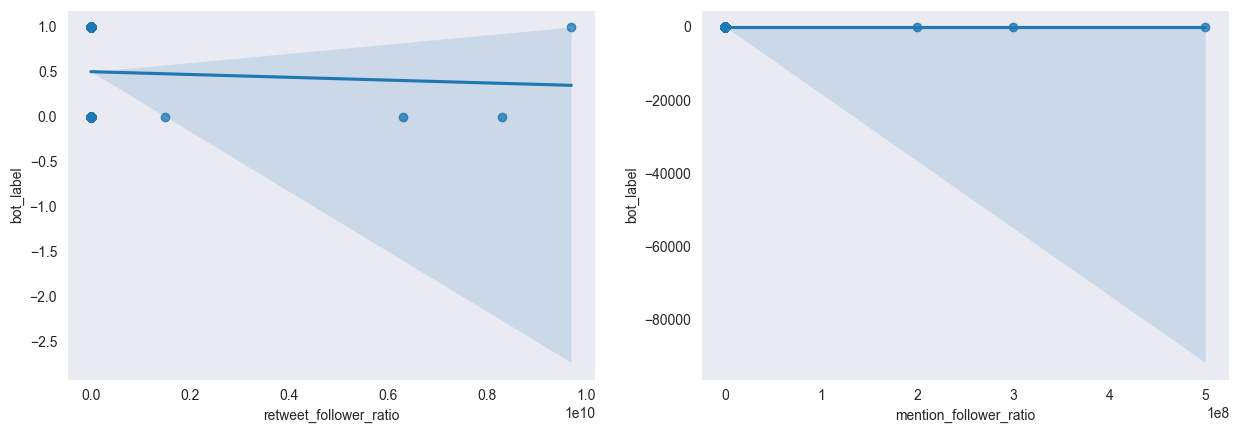

In [142]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_figwidth(15)
ax1 = sns.regplot(x=df.retweet_follower_ratio, y=df.bot_label, ax=ax1)
ax2 = sns.regplot(x=df.mention_follower_ratio, y=df.bot_label, ax=ax2)

Let's build an OLS model for our entire dataset.

In [143]:
#checking the relationship between our target variable and our features
X = sm.add_constant(X)
linear_model = sm.OLS(y, X)
results = linear_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              bot_label   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4818
Date:                Sat, 17 Aug 2024   Prob (F-statistic):              0.870
Time:                        21:29:20   Log-Likelihood:                -36288.
No. Observations:               50000   AIC:                         7.259e+04
Df Residuals:                   49991   BIC:                         7.267e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Note: The low coefficients indicate that the feature variables weak linear linear relationship to the target. The results also show a very low skewness, this could be a result of earlier standardization of the features. 

<h3> Causality Analysis</h3>

In [144]:
model = CausalModel(data=df,
                    treatment=["retweet_count", "mention_count", "follower_count",
                               "verified", "tweet_count", "hashtag_count"],
                    outcome="bot_label",
                    common_causes=[])

identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print(causal_estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                                          d                                   
──────────────────────────────────────────────────────────────────────────────
d[retweet_count  mention_count  follower_count  verified  tweet_count  hashtag

                     
───────(E[bot_label])
_count]              
Estimand assumption 1, Unconfoundedness: If U→{retweet_count,mention_count,follower_count,verified,tweet_count,hashtag_count} and U→bot_label then P(bot_label|retweet_count,mention_count,follower_count,verified,tweet_count,hashtag_count,,U) = P(bot_label|retweet_count,mention_count,follower_count,verified,tweet_count,hashtag_count,)

## Realized est

/usr/local/Caskroom/miniconda/base/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Note:

- Refute: Use a Placebo Treatment

- Estimated effect:-0.005734395561592831

- New effect:7.186153876848068e-08

- p value:0.96

- Refutation Results Breakdown

- Estimated Effect: -0.005734395561592831

- Description: This is the original causal effect estimate from your analysis. It represents the average effect of the treatment variables on the outcome (bot_label) before applying the placebo refutation.
New Effect: 7.186153876848068e-08

- Description: This is the causal effect estimate obtained using a placebo treatment. In this case, a placebo treatment is a variable that should have no real causal relationship with the outcome. This estimate is very close to zero, suggesting that the placebo treatment has little to no effect on the outcome, as expected.
p-value: 0.96

- Description: The p-value indicates the statistical significance of the difference between the original causal effect and the placebo effect. In this context:
High p-value (0.96): A high p-value suggests that the effect of the placebo treatment is not significantly different from zero. This means that the original causal effect (−0.0057) is not significantly different from what you would expect if the treatment had no effect.

- Estimand: The estimand is a non-parametric Average Treatment Effect (ATE) using the backdoor adjustment method. It means DoWhy is calculating the average effect of the treatment

- Realized Estimand: The analysis models the outcome (bot_label) as a function of all the treatment variables. This is the realized form of the estimand showing how the treatment variables together are related to the outcome.

- Mean Value: -0.005727352252091533 - This is the estimated average treatment effect (ATE). A value close to zero suggests that the overall impact of the treatment variables on the outcome (bot_label) is very small. In this case, a negative value means that, on average, the treatment variables are associated with a slight decrease in the likelihood of being labeled as a bot.

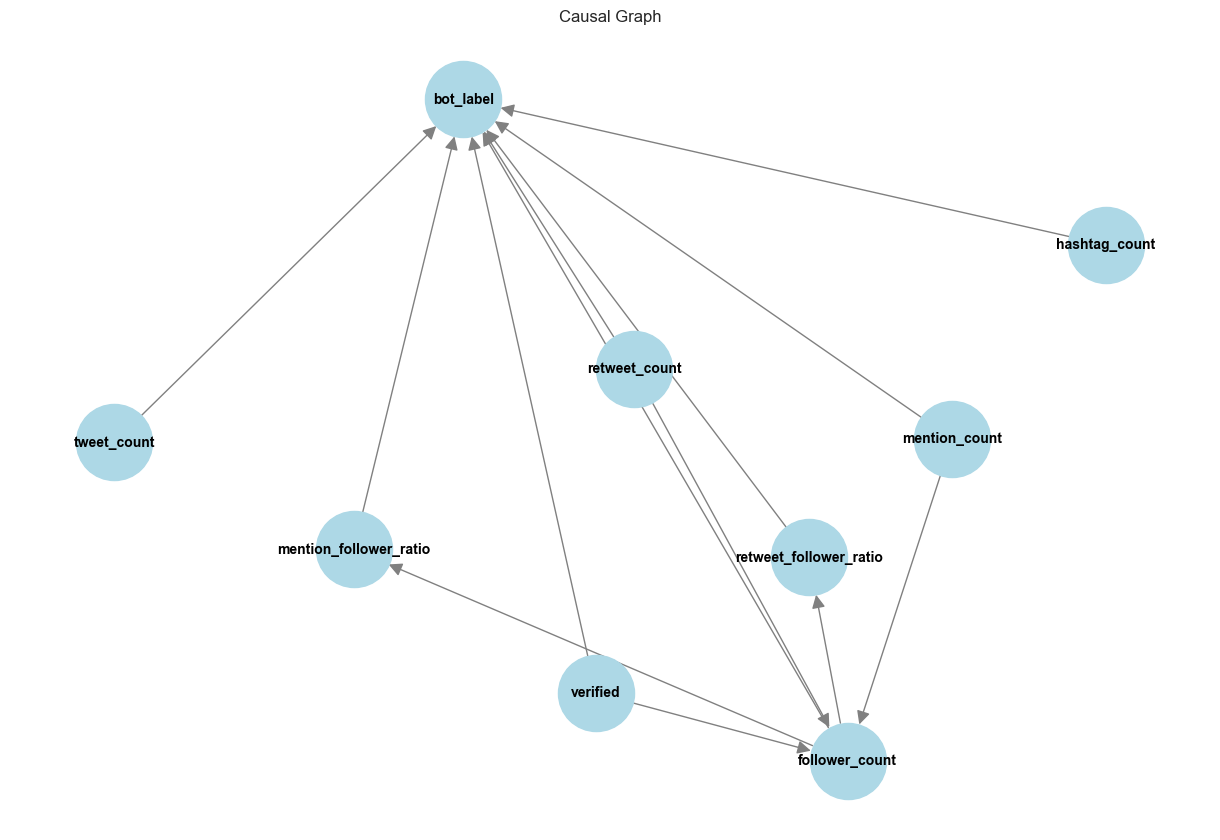

In [145]:
outcome = 'bot_label'
treatments = ['retweet_count', 'mention_count', 'verified',
              'tweet_count', 'hashtag_count']

#creating the causal graph
G = nx.DiGraph()

#adding nodes
nodes = treatments + [outcome]
G.add_nodes_from(nodes)

#adding edges (based on assumed causal relationships)
edges = [('retweet_count', 'bot_label'),
         ('mention_count', 'bot_label'),
         ('follower_count', 'bot_label'), # ollower_count affects bot_label
         ('verified', 'bot_label'),
         ('tweet_count', 'bot_label'),
         ('hashtag_count', 'bot_label'),
         ('retweet_follower_ratio', 'bot_label'),
         ('mention_follower_ratio', 'bot_label'),
         ('retweet_count', 'follower_count'), #retweet_count affects follower_count
         ('mention_count', 'follower_count'), #mention_count affects follower_count
         ('follower_count', 'retweet_follower_ratio'),
         ('follower_count', 'mention_follower_ratio'),
         ('verified', 'follower_count')]

G.add_edges_from(edges)

#visualizing the graph (optional)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', font_size=10, font_weight='bold', arrows=True, arrowsize=20)
plt.title('Causal Graph')
plt.show()